<a href="https://colab.research.google.com/github/GabsAki/fridge-scan/blob/main/Fridge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Refenreces:
- https://inference.roboflow.com/quickstart/run_a_model/#visualize-results
- https://universe.roboflow.com/karel-cornelis-q2qqg/aicook-lcv4d/model/3

# Installs

In [ ]:
pip install inference-sdk

# Inference

In [ ]:
from inference_sdk import InferenceHTTPClient

CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="fw0jtHtgqBNROCYOJtkM"
)

# Change to your image name here
IMAGE = "fridge.jpeg"

result = CLIENT.infer(IMAGE, model_id="aicook-lcv4d/3")

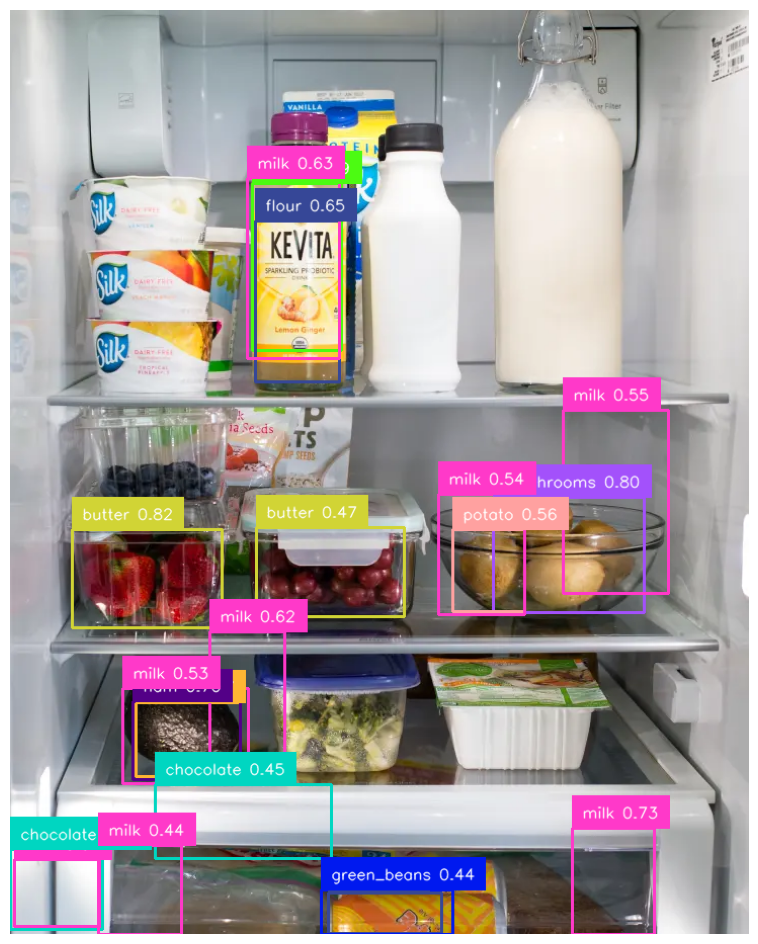

In [ ]:
import supervision as sv
from PIL import Image

image = Image.open(IMAGE)

# load the results into the supervision Detections api
detections = sv.Detections.from_inference(result)

# create supervision annotators
bounding_box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

labels = [
    f"{class_name} {confidence:.2f}"
    for class_name, confidence
    in zip(detections['class_name'], detections.confidence)
]

# annotate the image with our inference results
annotated_image = bounding_box_annotator.annotate(scene=image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections, labels=labels)

# display the image
sv.plot_image(annotated_image)